In [96]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [97]:
%matplotlib inline
plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus']=False

In [98]:
import os
os.getcwd()

'/Users/zoe/Downloads/data'

In [99]:
import os
os.chdir('/Users/zoe/Downloads/data')


In [100]:
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [102]:
train.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [103]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [104]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [105]:
train["year"]=train["datetime"].dt.year
train["month"]=train["datetime"].dt.month
train["day"]=train["datetime"].dt.day
train["hour"]=train["datetime"].dt.hour
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


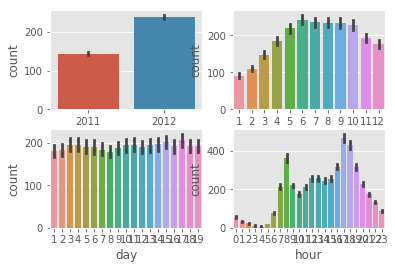

In [106]:
fig1, ((ax1, ax2), (ax3, ax4))=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,8)

sns.barplot(data=train, x="year",y="count", ax=ax1)
sns.barplot(data=train, x="month",y="count",ax=ax2)
sns.barplot(data=train, x="day",y="count",ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)

[Text(0,0.5,'Count'), Text(0.5,0,'Working Day'), Text(0.5,1,'Count for WD')]

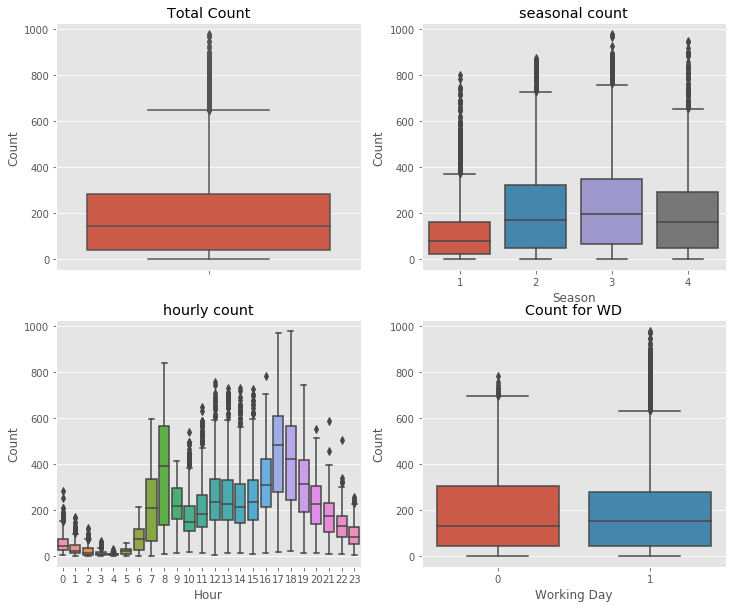

In [107]:
fig2, axes = plt.subplots(nrows=2,ncols=2)
fig2.set_size_inches(12,10)
sns.boxplot(data=train, y="count", orient="v", ax=axes[0][0])
sns.boxplot(data=train, y="count", x="season", orient="v", ax=axes[0][1])
sns.boxplot(data=train, y="count", x="hour", orient="v", ax=axes[1][0])
sns.boxplot(data=train, y="count", x="workingday", orient="v", ax=axes[1][1])

axes[0][0].set(ylabel='Count', title="Total Count")
axes[0][1].set(xlabel='Season', ylabel='Count', title="seasonal count")
axes[1][0].set(xlabel='Hour', ylabel='Count', title="hourly count")
axes[1][1].set(xlabel='Working Day', ylabel='Count', title="Count for WD")

[Text(0,0.5,'Count'), Text(0.5,0,'Working Day'), Text(0.5,1,'Count for WD')]

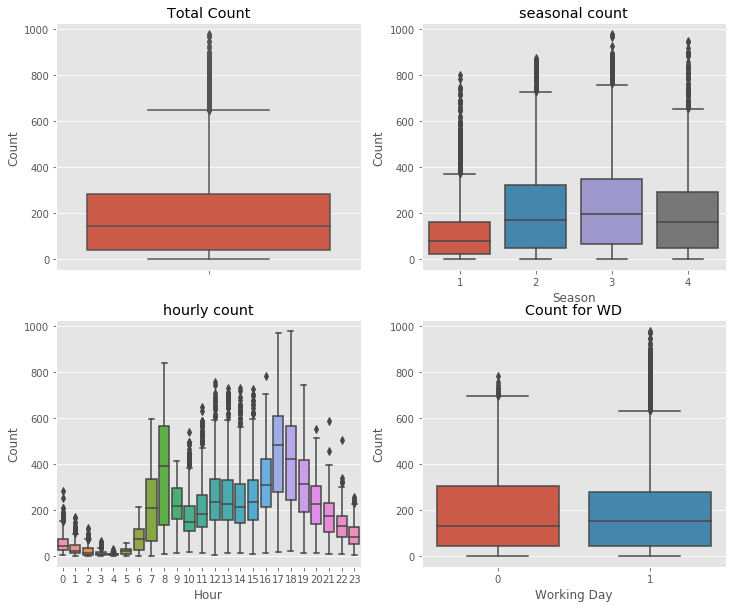

In [108]:
fig2, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2)
fig2.set_size_inches(12,10)
sns.boxplot(data=train, y="count", orient="v", ax=ax1)
sns.boxplot(data=train, y="count", x="season", orient="v", ax=ax2)
sns.boxplot(data=train, y="count", x="hour", orient="v", ax=ax3)
sns.boxplot(data=train, y="count", x="workingday", orient="v", ax=ax4)

ax1.set(ylabel='Count', title="Total Count")
ax2.set(xlabel='Season', ylabel='Count', title="seasonal count")
ax3.set(xlabel='Hour', ylabel='Count', title="hourly count")
ax4.set(xlabel='Working Day', ylabel='Count', title="Count for WD")

In [109]:
train["dayofweek"] = train["datetime"].dt.dayofweek
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

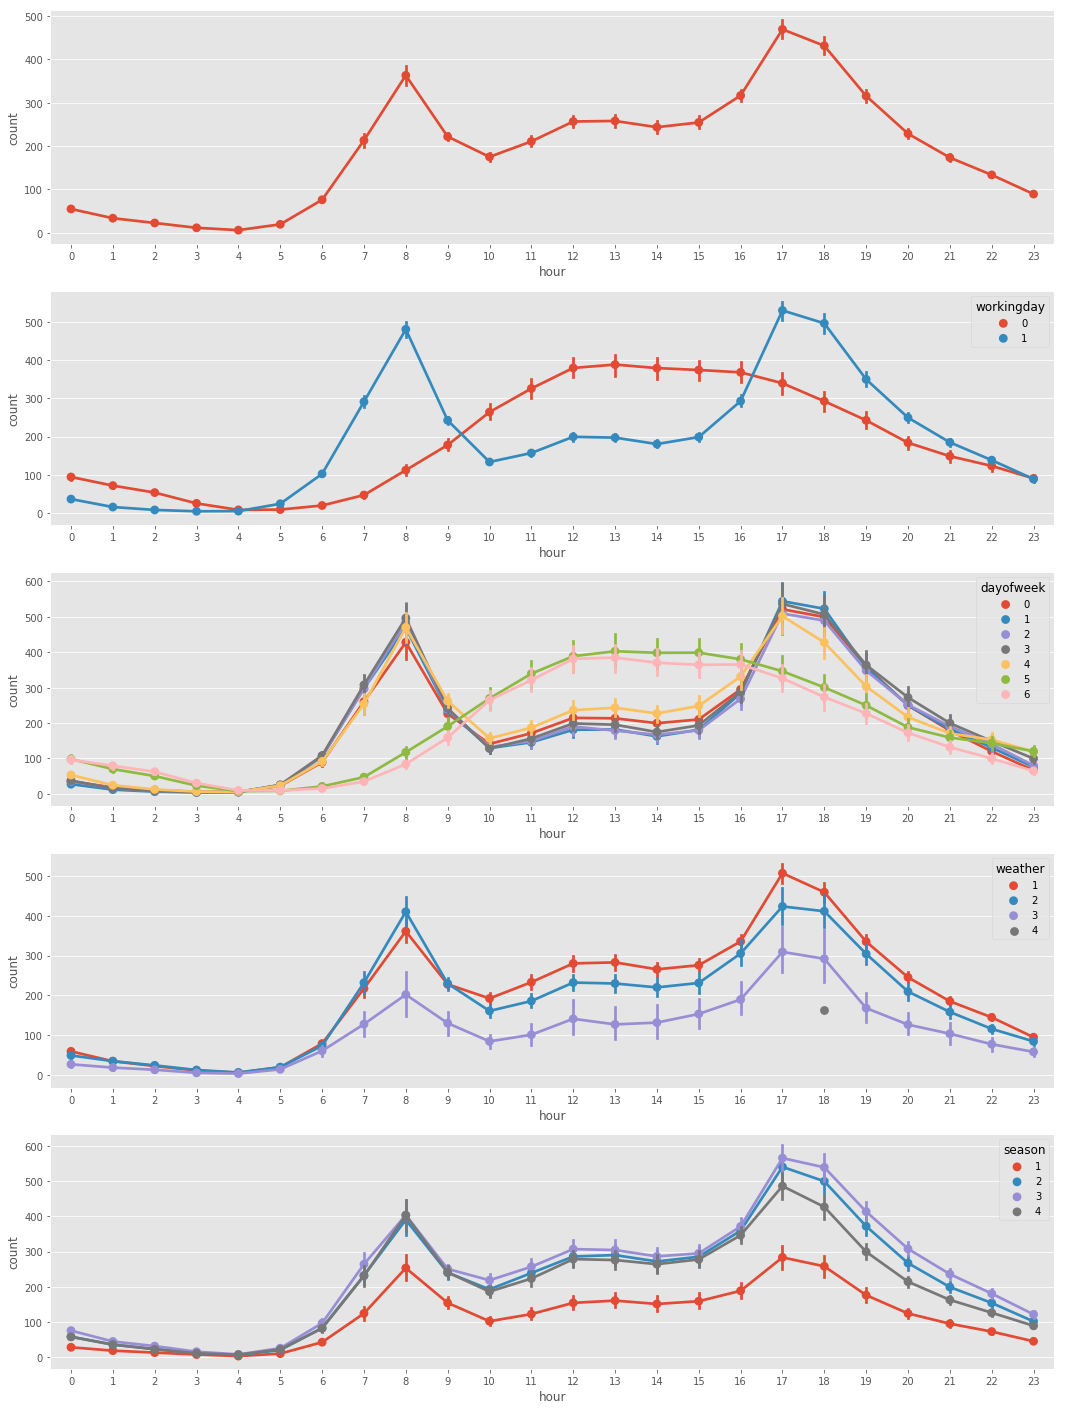

In [110]:
fig3, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5)
fig3.set_size_inches(18,25)

sns.pointplot(data=train, x="hour", y="count", ax=ax1)
sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)
sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4)
sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5)

In [111]:
corrmat = train[["temp","atemp","casual","registered","humidity","windspeed","count"]]
corrmat = corrmat.corr()
print(corrmat)

mask=np.array(corrmat)
mask[np.tril_indices_from(mask)]=False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


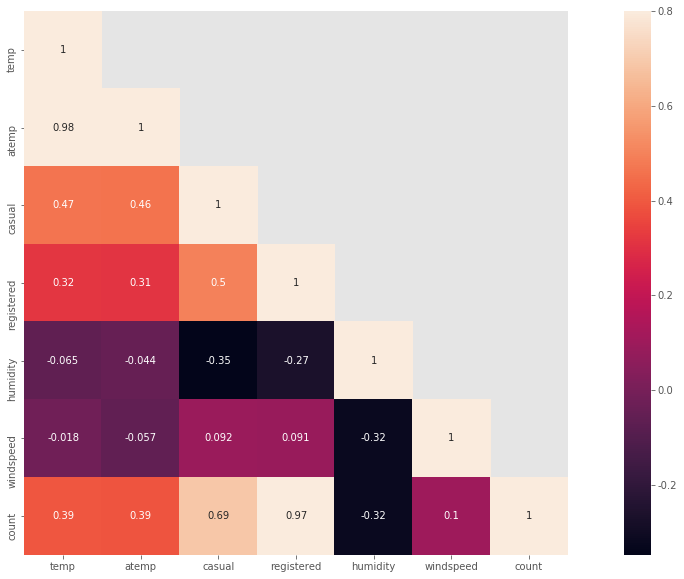

In [112]:
fig4, ax = plt.subplots()
fig4.set_size_inches(20,10)
sns.heatmap(corrmat, mask=mask, vmax=.8, square=True, annot=True)

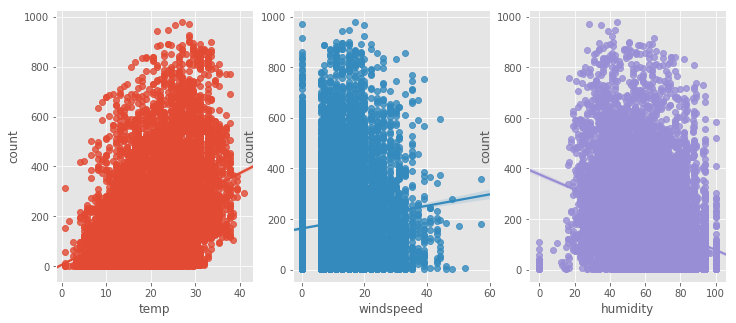

In [113]:
fig5, (ax1,ax2,ax3) = plt.subplots(ncols=3)
fig5.set_size_inches(12,5)
sns.regplot(x="temp",y="count", data=train, ax=ax1)
sns.regplot(x="windspeed",y="count", data=train, ax=ax2)
sns.regplot(x="humidity", y="count", data=train, ax=ax3)

In [114]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [115]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime","year_month"]]

(10886, 18)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1
5,2011-01-01 05:00:00,2011-1
6,2011-01-01 06:00:00,2011-1
7,2011-01-01 07:00:00,2011-1
8,2011-01-01 08:00:00,2011-1
9,2011-01-01 09:00:00,2011-1


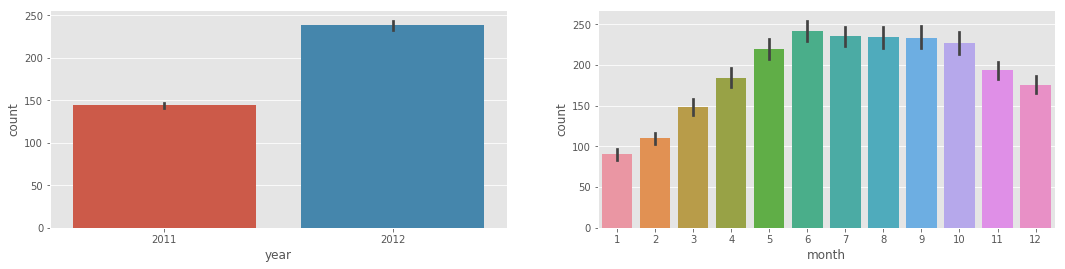

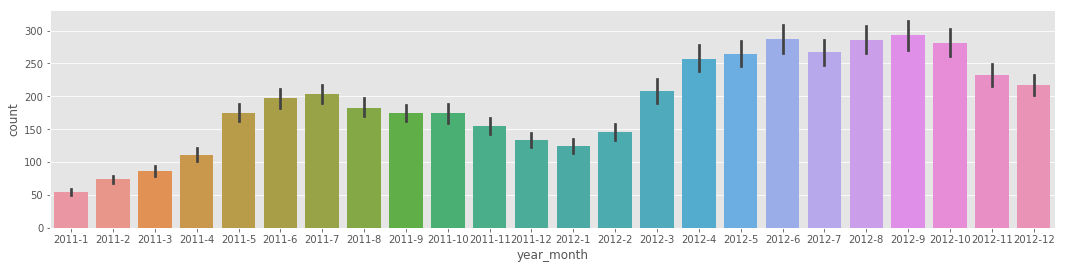

In [116]:
fig, (ax1,ax2)=plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)

fig,ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=train, x="year_month", y="count", ax=ax3)

In [117]:
trainWithoutOutliers = train[np.abs(train["count"]-train["count"].mean()) <= (3*train["count"].std())]
print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 18)
(10739, 18)


AttributeError: module 'numpy' has no attribute 'loglp'

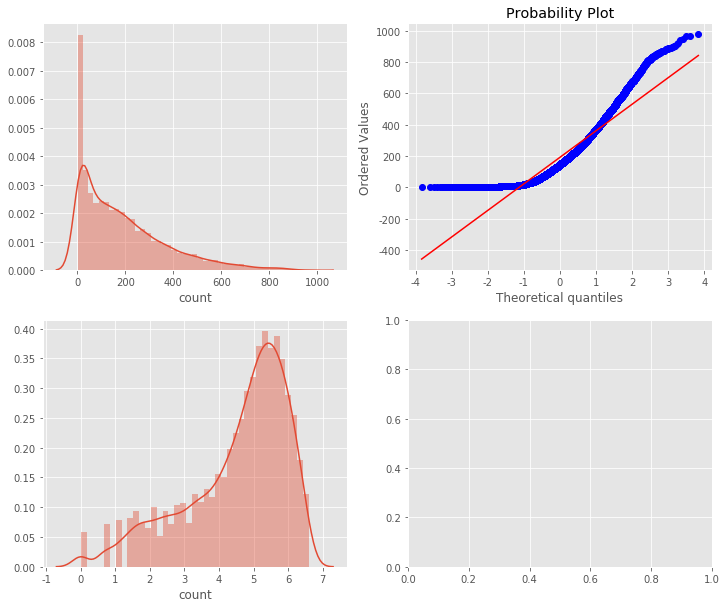

In [118]:
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12,10)

sns.distplot(train["count"], ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.loglp(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

In [119]:
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.shape

(6493, 9)

In [120]:
test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['hour']=test['datetime'].dt.hour
test['dayofweek']=test['datetime'].dt.dayofweek

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5,2011-1


In [123]:
train['dayofweek'] = train['datetime'].dt.dayofweek

In [124]:
rfModel_wind = RandomForestRegressor()
f_columns = ['season','weather','humidity','month','temp','year','hour','dayofweek','atemp']
X_train = train[f_columns]
y_r_label = train['registered']
y_c_label = train['casual']
print(X_train.shape)
print(y_r_label.shape)
print(y_c_label.shape)

(10886, 9)
(10886,)
(10886,)


In [125]:
X_test = test[f_columns]
X_test.shape

(6493, 9)

In [126]:
rfModel = RandomForestRegressor()
rfModel.fit(X_train, y_r_label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [127]:
testRegisteredValues = rfModel.predict(X_test)

In [128]:
test['registered']=testRegisteredValues
test['registered'].isnull().sum()

0

In [129]:
rfModel.fit(X_train, y_c_label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [130]:
testCasualValues = rfModel.predict(X_test)
test['casual']=testCasualValues
test['casual'].isnull().sum()

0

In [131]:
pd.melt?
pd.DataFrame?

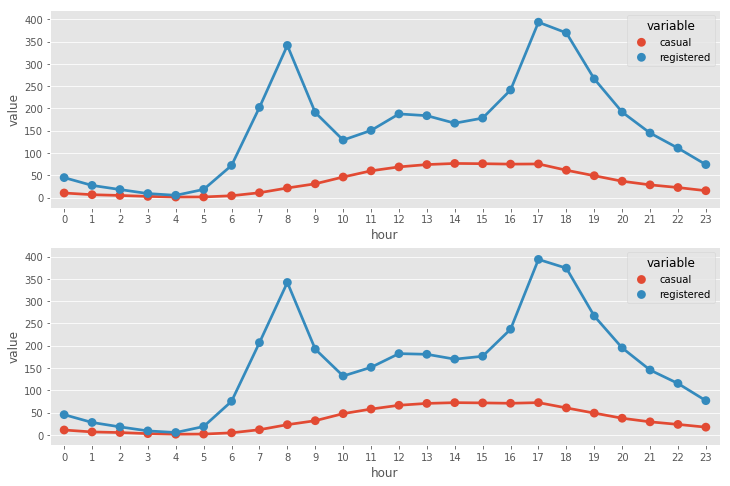

In [132]:
fig, (ax1,ax2) = plt.subplots(nrows=2)
fig.set_size_inches(12,8)

hourTransformed = pd.melt(train[['hour','casual','registered']], id_vars=['hour'], value_vars=['casual','registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(['hour','variable'],sort=True)['value'].mean()).reset_index()
sns.pointplot(x=hourAggregated['hour'], y=hourAggregated['value'],hue=hourAggregated['variable'],hue_order=['casual','registered'], data=hourAggregated, join=True, ax=ax1)
hourTransformed.head()

hourTransformed = pd.melt(test[['hour','casual','registered']], id_vars=['hour'], value_vars=['casual','registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(['hour','variable'],sort=True)['value'].mean()).reset_index()
sns.pointplot(x=hourAggregated['hour'],y=hourAggregated['value'],hue=hourAggregated['variable'],hue_order=['casual','registered'],data=hourAggregated, join=True, ax=ax2)

In [133]:
data = train.append(test)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [140]:
from sklearn.metrics import make_scorer
def rmsle(predicted_values, actual_values, convertExp=True):
    
    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)
        
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    difference = log_predict - log_actual
    difference = np.square(difference)
    mean_difference = difference.mean()
    score = np.sqrt(mean_difference)
    
    return score

In [141]:
categoricalFeatureNames = ['season','holiday','workingday','weather','dayofweek','year','hour']
numericalFeatureNames = ['temp','humidity','windspeed','atemp','casual','registered']
dropFeatures = ['count','datetime','month']

In [137]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

In [138]:
X_train = data[pd.notnull(data['count'])].sort_values(by=['datetime'])
X_test = data[~pd.notnull(data['count'])].sort_values(by=['datetime'])
datetimecol = X_test['datetime']
y_train = X_train['count']

In [139]:
X_train = X_train.drop(dropFeatures, axis=1)
X_test = X_test.drop(dropFeatures,axis=1)

In [149]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
dataWind0 = data[data['windspeed']==0]
dataWindNot0 = data[data['windspeed']!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ['season','weather','humidity','month','temp','year','atemp']
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0['windspeed'])

wind0Values = rfModel_wind.predict(X=dataWind0[windColumns])
dataWind0['windspeed'] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required.

In [151]:
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.shape
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.shape

(6493, 9)

In [153]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 16)

In [146]:
from sklearn.ensemble import RandomForestClassifier
def predict_windspeed(data):
    
    datawind0 = data.loc[data['windspeed']==0]
    datawindnot0 = data.loc[data['windspeed']!=0]
    
    wCol = ["season","weather","humidity","month","temp","year","atemp"]
    datawindnot0["windspeed"] = datawindnot0["windspeed"].astype("str")
    rfModel_wind = RandomForestClassifier()
    rfModel_wind.fit(datawindnot0[wCol],datawindnot0["windspeed"])
    wind0values = rfModel_wind.predict(X=datawind0[wCol])
    predictwind0 = datawind0
    predictwindnot0 = datawindnot0

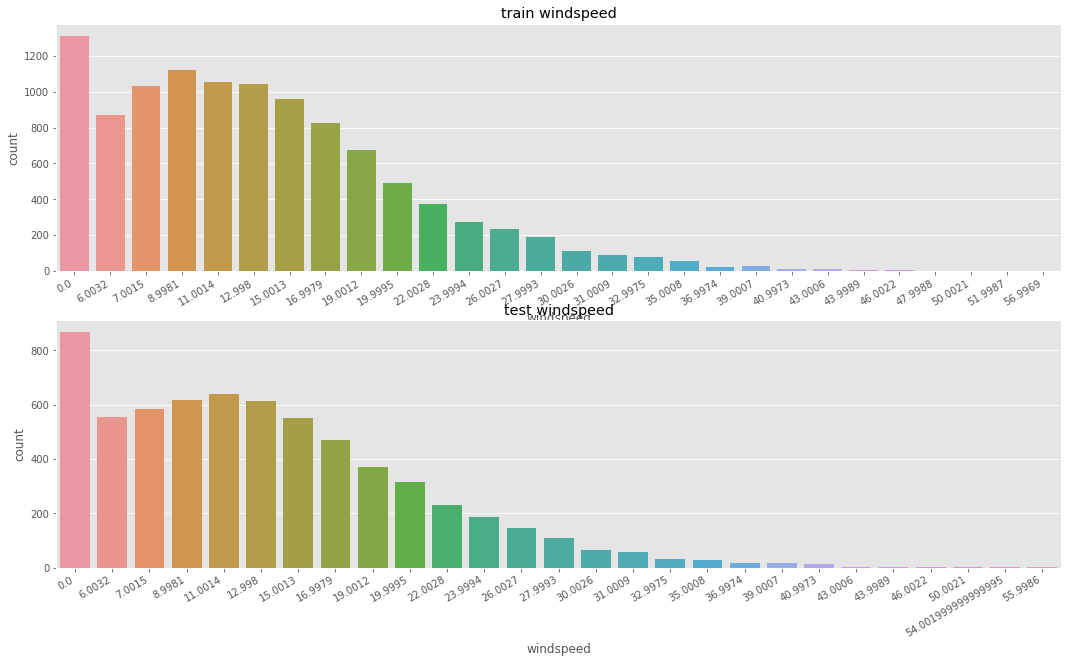

In [154]:

# widspeed 풍속에 0 값이 가장 많다. => 잘못 기록된 데이터를 고쳐 줄 필요가 있음
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count',title="test windspeed")
sns.countplot(data=test, x="windspeed", ax=axes[1])


In [156]:

# 풍속이 0인것과 아닌 것의 세트를 나누어 준다.
trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]
print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 19)
(9573, 19)


In [160]:
from sklearn.ensemble import RandomForestClassifier
def predict_windspeed(data):

    dataWind0 = data.loc[data['windspeed'] == 0]
    dataWindNot0 = data.loc[data['windspeed'] != 0]
    wCol = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
    rfModel_wind = RandomForestClassifier()

    # wCol에 있는 피처의 값을 바탕으로 풍속을 학습시킨다.
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])

    # 학습한 값을 바탕으로 풍속이 0으로 기록 된 데이터의 풍속을 예측한다.
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0

    predictWind0["windspeed"] = wind0Values

    # dataWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
    data = predictWindNot0.append(predictWind0)

    # 풍속의 데이터타입을 float으로 지정해 준다.
    data["windspeed"] = data["windspeed"].astype("float")

    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data

In [159]:
train = predict_windspeed(train)
test = predict_windspeed(test)

fig,ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count', title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=ax1)

ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required.